# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


/Users/gavinpark/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Part 2: Implement SVD for Dimensionality Reduction

In [8]:
def apply_svd_custom(X_train, X_test, n_components):
    U, S, Vt = np.linalg.svd(X_train, full_matrices=False)

    # Step 2: Keep only the top 'n_components' singular values
    S_reduced = np.diag(S[:n_components])  # Reduced diagonal matrix

    # Step 3: Transform training and test data to the reduced dimensionality
    X_train_reduced = np.dot(U[:, :n_components], S_reduced)
    X_test_reduced = np.dot(X_test, Vt[:n_components, :].T)
    
    return X_train_reduced, X_test_reduced, Vt
    raise NotImplementedError("Your implementation here...")

## Part 3: Train Logistic Regression and Measure Performance

In [5]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [9]:
# Define a list of SVD component numbers to experiment with
svd_components = [50, 100, 150]

# Store the results for each experiment
results = []

print("Training models with different levels of SVD preprocessing...")

# Loop through each number of components and run the experiment
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, Vt = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Print the results for each component size
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    # Store the results in the list
    results.append((n_components, accuracy, training_time))


Training models with different levels of SVD preprocessing...
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9085, Training time: 7.9997 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 30.5170 seconds
Applying custom SVD with 150 components...
SVD components: 150, Accuracy: 0.9198, Training time: 48.5163 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


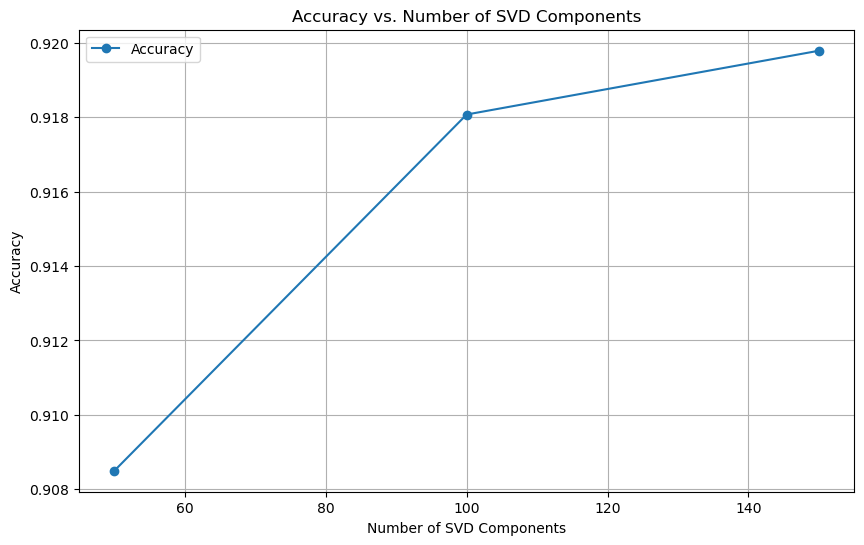

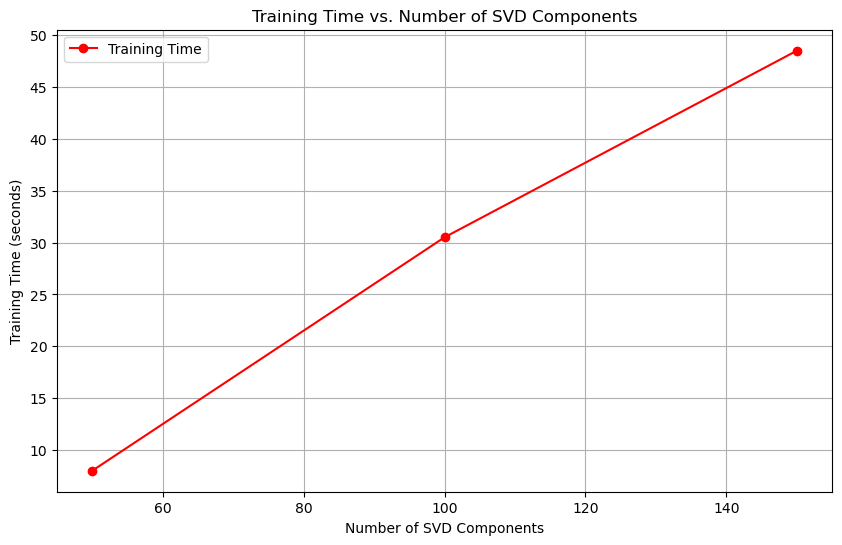

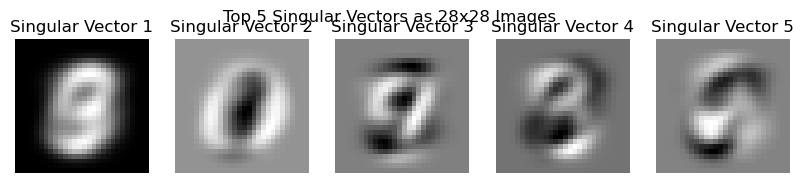

In [10]:
import matplotlib.pyplot as plt

# Unpack results for plotting
svd_components = [result[0] for result in results]
accuracies = [result[1] for result in results]
training_times = [result[2] for result in results]

# Plot Accuracy vs. Number of SVD Components
plt.figure(figsize=(10, 6))
plt.plot(svd_components, accuracies, marker='o', label="Accuracy")
plt.title("Accuracy vs. Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# Plot Training Time vs. Number of SVD Components
plt.figure(figsize=(10, 6))
plt.plot(svd_components, training_times, marker='o', color='r', label="Training Time")
plt.title("Training Time vs. Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Training Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

# Visualize the Top 5 Singular Vectors (from Vt)
top_singular_vectors = Vt[:5]  # Assuming Vt is from your SVD implementation
plt.figure(figsize=(10, 2))
for i, vec in enumerate(top_singular_vectors):
    plt.subplot(1, 5, i+1)
    plt.imshow(vec.reshape(28, 28), cmap='gray')
    plt.title(f"Singular Vector {i+1}")
    plt.axis('off')
plt.suptitle("Top 5 Singular Vectors as 28x28 Images")
plt.show()


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

In [ ]:
#The graphs show that as the number of SVD components increases, the accuracy of the logistic regression model improves, particularly from 60 to 100 components, 
#after which the accuracy gain becomes insignificant. However, this improvement in accuracy comes at the cost of increased training time, which grows linearly as more 
#components are added, indicating a clear trade-off between model performance and computational efficiency. The visualized top 5 singular vectors, reshaped into 28x28 #images, reveal 
#the core features of the dataset, with the first vector representing a more general shape and the subsequent vectors capturing variations and finer details. 
#This suggests that while SVD effectively reduces dimensionality, selecting an optimal number of components—such as around 100—strikes a good balance between maintaining accuracy 
#and reducing training time.